In [1]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:

# Load data but dropna which does not work well with date-offsetting
data = pd.read_csv('data/air_quality_data/ozone_nyc.csv', parse_dates=['date'], index_col='date').dropna()
data.head()

,Ozone
date,
2000-01-01,0.004032
2000-01-02,0.009486
2000-01-03,0.005580
2000-01-04,0.008717
2000-01-05,0.013754


In [3]:

# Create the rolling window object
rolling = data.rolling(360)['Ozone']
rolling

Rolling [window=360,center=False,axis=0,method=single]

In [4]:

# Apply the quantile method to the rolling window object
data['q10'] = rolling.quantile(.1)
data['q50'] = rolling.quantile(.5)
data['q90'] = rolling.quantile(.9)

In [5]:
data.head()

,Ozone,q10,q50,q90
date,,,,
2000-01-01,0.004032,NaN,NaN,NaN
2000-01-02,0.009486,NaN,NaN,NaN
2000-01-03,0.005580,NaN,NaN,NaN
2000-01-04,0.008717,NaN,NaN,NaN
2000-01-05,0.013754,NaN,NaN,NaN


In [6]:
data.tail()

,Ozone,q10,q50,q90
date,,,,
2017-03-27,0.005640,0.01134,0.026424,0.040893
2017-03-28,0.013870,0.01134,0.026388,0.040893
2017-03-29,0.034341,0.01134,0.026388,0.040893
2017-03-30,0.026059,0.01134,0.026388,0.040893
2017-03-31,0.035983,0.01134,0.026388,0.040893


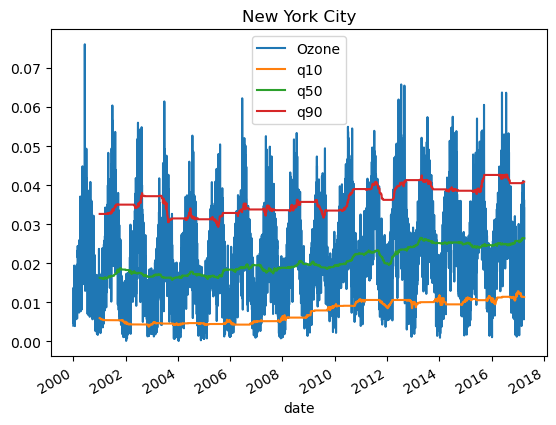

In [8]:

# Plot data 
# Rolling quantiles help to assess the volatility of the time series
data.plot(title='New York City')
plt.show()